# Exploratory Data Analysis (Part 1)

This is a repeat of the Exploratory Data Analysis (Part 1) as this is done in Jupyter Notebook.Before any analysis can be performed, an Analyst or a Data Scientist has to deal with a given dataset. Data can come in two forms – categorical and/or continous variables. Exploration of data is the first step in any data science work flow and it occurs before data cleaning, preparation and modeling. For this blog post, I will be doing Exploratory Data Analysis (EDA) using Python on the Boston houses-price dataset (regression problem) from Scikit-learn datasets. My development environment of choice is Spyder (Scientific PYthon Development EnviRonment) with Python 3.6 installed. Libraries used in this EDA are Pandas, Scikit-learn, Matplotlib and/or Seaborn.

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Next, We combine the target variable with the existing data frame.

In [3]:
df['MEDV'] = boston.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.hist(df['CRIM'])
plt.xlabel("CRIM")
plt.ylabel("Frequency")
plt.show()

Use the Seaborn library to plot the same histogram.

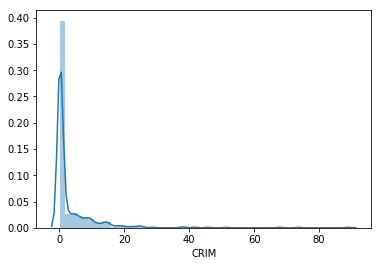

In [6]:
import seaborn as sns
fig = sns.distplot(df['CRIM'], bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAC839C860>,
      dtype=object)

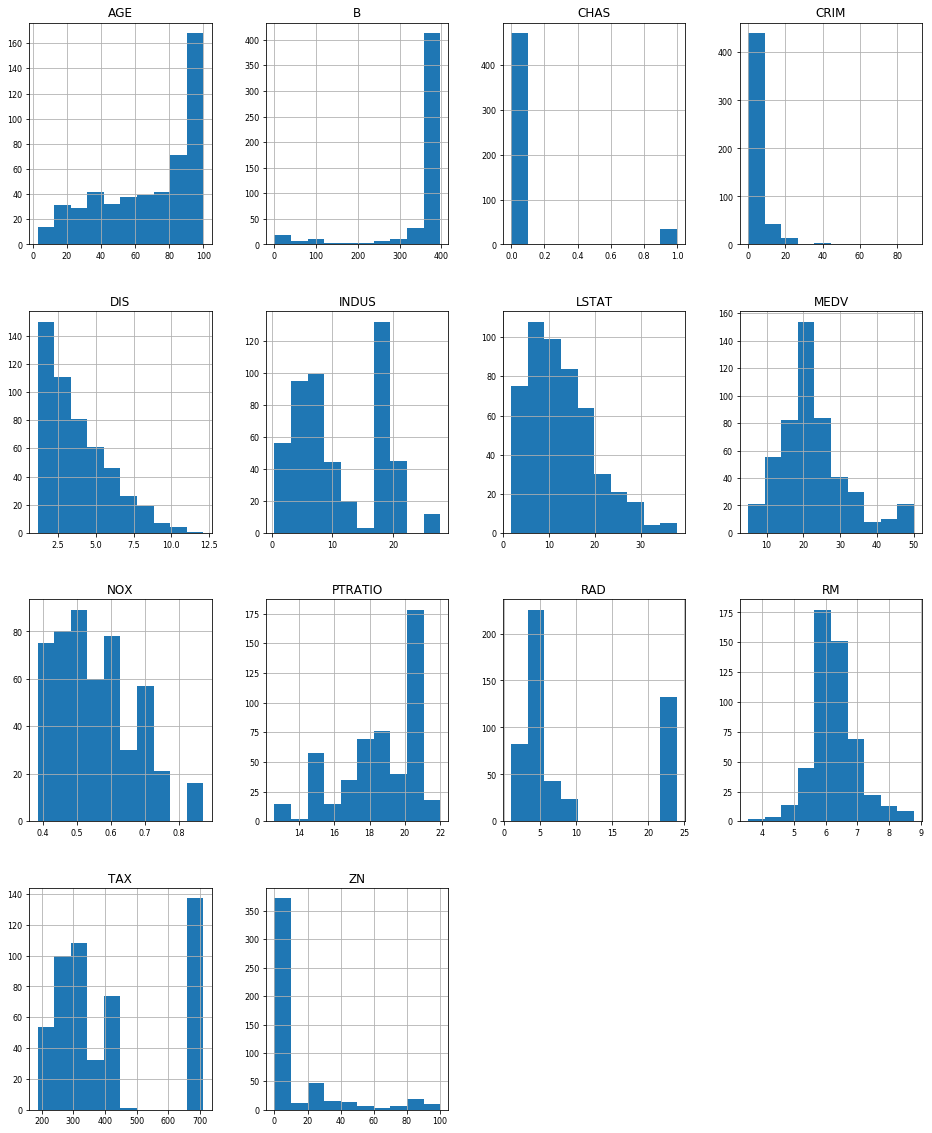

In [7]:
df.hist(figsize=(16,20), xlabelsize=8, ylabelsize=8)

To check the feature-to-feature correlation, we can check the correlation matrix with the following:

In [9]:
corr_matrix = df.corr()
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

Let's examine the variables that correlate with the target variable MEDV. We can do the following:

In [15]:
features_rel = corr_matrix['MEDV']
print(features_rel)

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


We can now select the features that are strongly correlated with MEDV. Here MEDV will be perfectly correlated with MEDV and we will leave it first.

In [18]:
cor_features = features_rel[abs(features_rel) > 0.5]
print(cor_features)

RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


We can then look at the normality plots of these four variables.

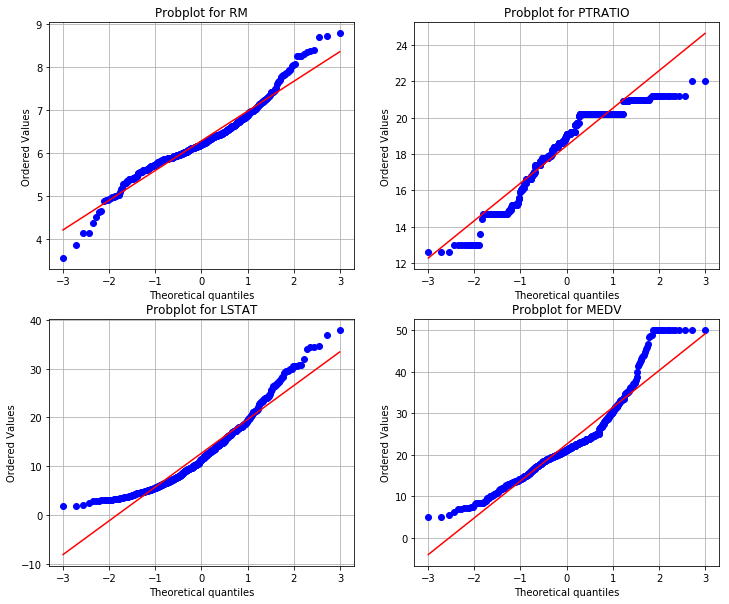

In [20]:
from scipy import stats
plt.figure(figsize=(12,10))
ax1 = plt.subplot(221)
res = stats.probplot(df['RM'], plot=plt)
ax1.set_title("Probplot for RM")
plt.grid(True)

ax2 = plt.subplot(222)
res = stats.probplot(df['PTRATIO'], plot=plt)
ax2.set_title("Probplot for PTRATIO")
plt.grid(True)

ax3 = plt.subplot(223)
res = stats.probplot(df['LSTAT'], plot=plt)
ax3.set_title("Probplot for LSTAT")
plt.grid(True)

ax4 = plt.subplot(224)
res = stats.probplot(df['MEDV'], plot=plt)
ax4.set_title("Probplot for MEDV")
plt.grid(True)
plt.show()

From the normal probability plots, we can tell that normal distribution is not a good model for these variables. (non-linear probability plot graphs). We will come back to these 4 variables in the next post.

As we know, that the calculated correlations have not been filtered for outliers, we can do the following to identify any outliers or any curvilinear relationships. We use Seaborn’s pairplot function to do so.

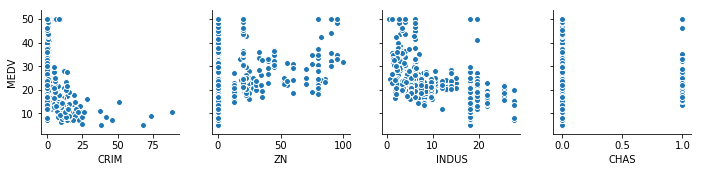

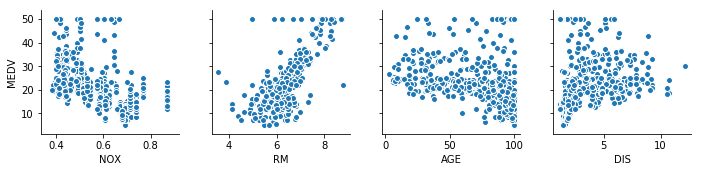

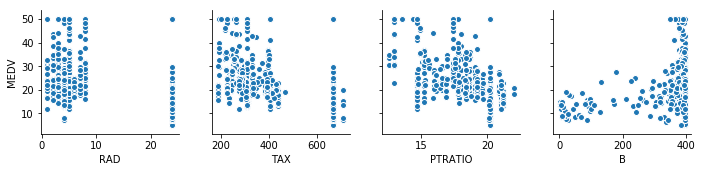

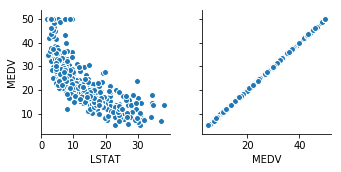

In [21]:
for i in range(0, len(df.columns), 4):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+4],
                y_vars=['MEDV'])

It’s so beautiful right! RM is a clear linear relationship with MEDV, so it is a candidate as a predictor of House price. LSTAT shows a negative linear correlation (-0.738) with MEDV, but the graph shows a curvilinear trend.

We can also plot an overall heatmap, to explore feature to feature relationship in this dataset.

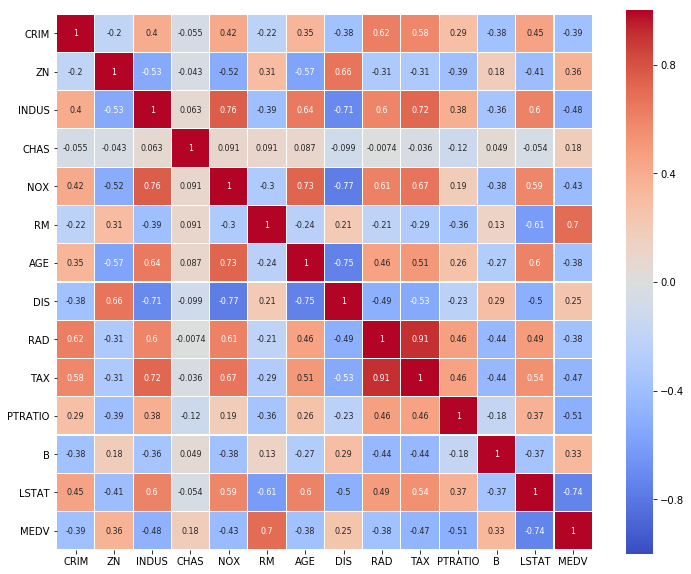

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size":8}, square=True)

With this, we have done some EDA for the Boston House Price Data set. 